# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.
The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:
$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$
where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:
- the **Internal Energy** per spin (with $h=0$):
$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
- the **Heat Capacity** (with $h=0$):
$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$
- The **magnetization** (with $h \not= 0$):
Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.
$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$
The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'cmr10','font.size':'20','axes.formatter.use_mathtext':'True','mathtext.fontset':'cm'})
    
def theoretical_values(label,h,T):
    beta = 1/T
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    e = -J*( th + ch*thN )/( 1 + thN )
    if label=='e':
        return e
    heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
    if label=='heat':
        return heat
    if h==0 :
        M=np.zeros_like(T) 
    else:
        b = 1 / T
        l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))
        l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))
        Z = l1**Ns + l2**Ns
        M = (np.exp(b * J) * np.sinh(b * h) * 
        ((l1**(Ns-1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))) + 
        (l2**(Ns-1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))))) / Z
    if label=='M':
        return M
    X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    if label=='chi':
        return X

def plot_figure(datametro,datagibbs,label, h, title,):
    T = datametro[:,0]
    M = theoretical_values(label,h,T)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    plt.suptitle(title, fontsize=16)
    plot_data(axs, datametro,datagibbs, T, M, title)
    plt.tight_layout()
    plt.show()    

def plot_data(axs, datametro, datagibbs, T, M, title):
    variable_mapping = {"magnetization": 1,"heat capacity": 3,"susceptibility": 5,"total energy": 7}
    number = variable_mapping.get(title, "Invalid title")
    axs[0].errorbar(datametro[:,0], datametro[:,number], yerr=datametro[:,number+1],
                       color='#008080', ecolor='#90ee90',label='Metropolis')
    axs[0].errorbar(datagibbs[:,0], datagibbs[:,number], yerr=datagibbs[:,number+1],
                       color='#8a56d2', ecolor='#c4a9e9',label='Gibbs')
    axs[0].set_ylabel(title)
    axs[0].set_xlabel('Temperature')
    axs[0].set_title(title)
    axs[0].plot(T, M, color='red', linestyle='--', label='Theoretical values')
    axs[0].legend()
    
    axs[1].plot(datametro[:,0],datametro[:,number+1], color='#90ee90',label='Metropolis')
    axs[1].plot(datagibbs[:,0],datagibbs[:,number+1], color='#c4a9e9',label='Gibbs')
    axs[1].set_title('Error')
    axs[1].set_xlabel('Temperature')
    axs[1].set_ylabel('Error')
    axs[1].legend()


## <span style="color:purple"> Solution Exercise 06.1</span>

### Problem's Theory:
The Ising model consist of a lattice of spins that globally represents a magnet. The spins can assume two values $\pm 1$ representing up or down pointing dipoles of unit magnitude.
The relation between the magnetic dipole $\mu$ and its total angular momentum $J$ is: $$\vec{\mu}=g\frac{e}{2mc}\vec{j}$$ where $g$ is the Lande's factor; more precisely, along a specific direction, $\mu_z=g\mu_Bm$. In the ising model $s=\frac{1}{2}$ so $\mu_z=\pm \mu_B$.
The Ising model can be solved exactly finding the partition function so all the quantity can be predicted.\
The hamiltonian of an 1D Ising Model is $$ H=-J\sum_{\left< ij\right>}s_is_j-B\sum_is_i$$ 
where $J=1$ means that we are modeling a ferromagnetic system even if there is no phase transition due to the low dimensionality of the system (in the 2D and 3D Ising model there is phase transition for ferromagnets).
To simulate an 1D ising model can be used the Metropolis algorithm that propose to invert some spins and accept or reject the move making use of the boltzmann probabilities. An alternative way to sample the distribution probability is the **Gibb's sampling**.
It can be seen as a Metropolis algorithm where the move is always accepted, more precisely at every step all the n variables except one ($x_i$) are fixed. The new $x_i$ is sampled by the transition probability $p_{1|n-1}(x_i|x_{j\neq i})$.
for the 1D Ising model can be show that: $$p(x_i|x_{j\neq i})=\frac{1}{1+\exp{\pm 2\beta J \sum_{\left<ij\right>}s_j}}$$
### Problem's approach:
First of all in the NSL_simulator i have implemented the Gibbs sampler in the `move` method proposing a spin flip with transition probability above. 
```cpp
void System :: move(int i){ // Propose a MC move for particle i
  if(_sim_type == 3){ //Gibbs sampler for Ising
    // TO BE FIXED IN EXERCISE 6
    double cond_prob=1/(1+exp(-2*_beta*_J*_particle(i).getspin()*(_particle(this->pbc(i-1)).getspin()+_particle(this->pbc(i+1)).getspin())));
    if(cond_prob>_rnd.Rannyu(0.,1.)){
      _particle(i).flip();
    }
```
Then in the `measure` and `average` functions i have implemented magnetization, specific heat and susceptibility.

### Code:
Implementation in `measure` of **magnetization**:
```cpp
if(_measure_magnet){
    for (int i=0; i<_npart; i++) {_measurement(_index_magnet) += double(_particle(i).getspin());}
    _measurement(_index_magnet)/=double(_npart);
  }
```
Implementation in `measure` of **specific heat**:
```cpp
if(_measure_cv){
    _measurement(_index_cv)=pow(tenergy_temp,2);
  }
```
Implementation in `measure` of **susceptibility**:
```cpp
if(_measure_chi){
  double appoggio=0;
  for (int i=0; i<_npart; i++) appoggio += double(_particle(i).getspin());
  appoggio=pow(appoggio,2);
  _measurement(_index_chi) = _beta*appoggio/double(_npart);
  }
```
Implementation in `average` for **magnetization** and **susceptibility** is analogous:
```cpp
  if(_measure_******){
    coutf.open(output_path+"OUTPUT/magnetization.dat",ios::app);
    average  = _average(_index_magnet);
    sum_average = _global_av(_index_magnet);
    sum_ave2 = _global_av2(_index_magnet);
    coutf << setw(12) << blk
          << setw(12) << average
          << setw(12) << sum_average/double(blk)
          << setw(12) << this->error(sum_average, sum_ave2, blk) << endl;
    coutf.close();
  }
```
Implementation in `average` for **specific heat**:
In this case is slightly different, we have to compute $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$. To do so, before computing global averages i have inserted this line of code: 
```cpp
if(_measure_cv){_average(_index_cv) = _npart*pow(_beta,2)*(_average(_index_cv)-pow(_average(_index_tenergy),2))}else{...}
```
### Equilibration:
To perform equilibration I've started $291$ simulations at different temperatures between $0.10$ and $3.00$ saving the result in an directory created during the execution of the code. 
Equilibration is important before starting measuring to avoid correlations, in fact, when equilibrium is reached, every probability i proportional to Boltzmann's weights so we are correctly sampling the probability distribution.
In this simulations the initial configurations of the spins are chosen randomly.
### Plot parameters:
- $N_{blocks}=100$
- $N_{steps}=10^4$

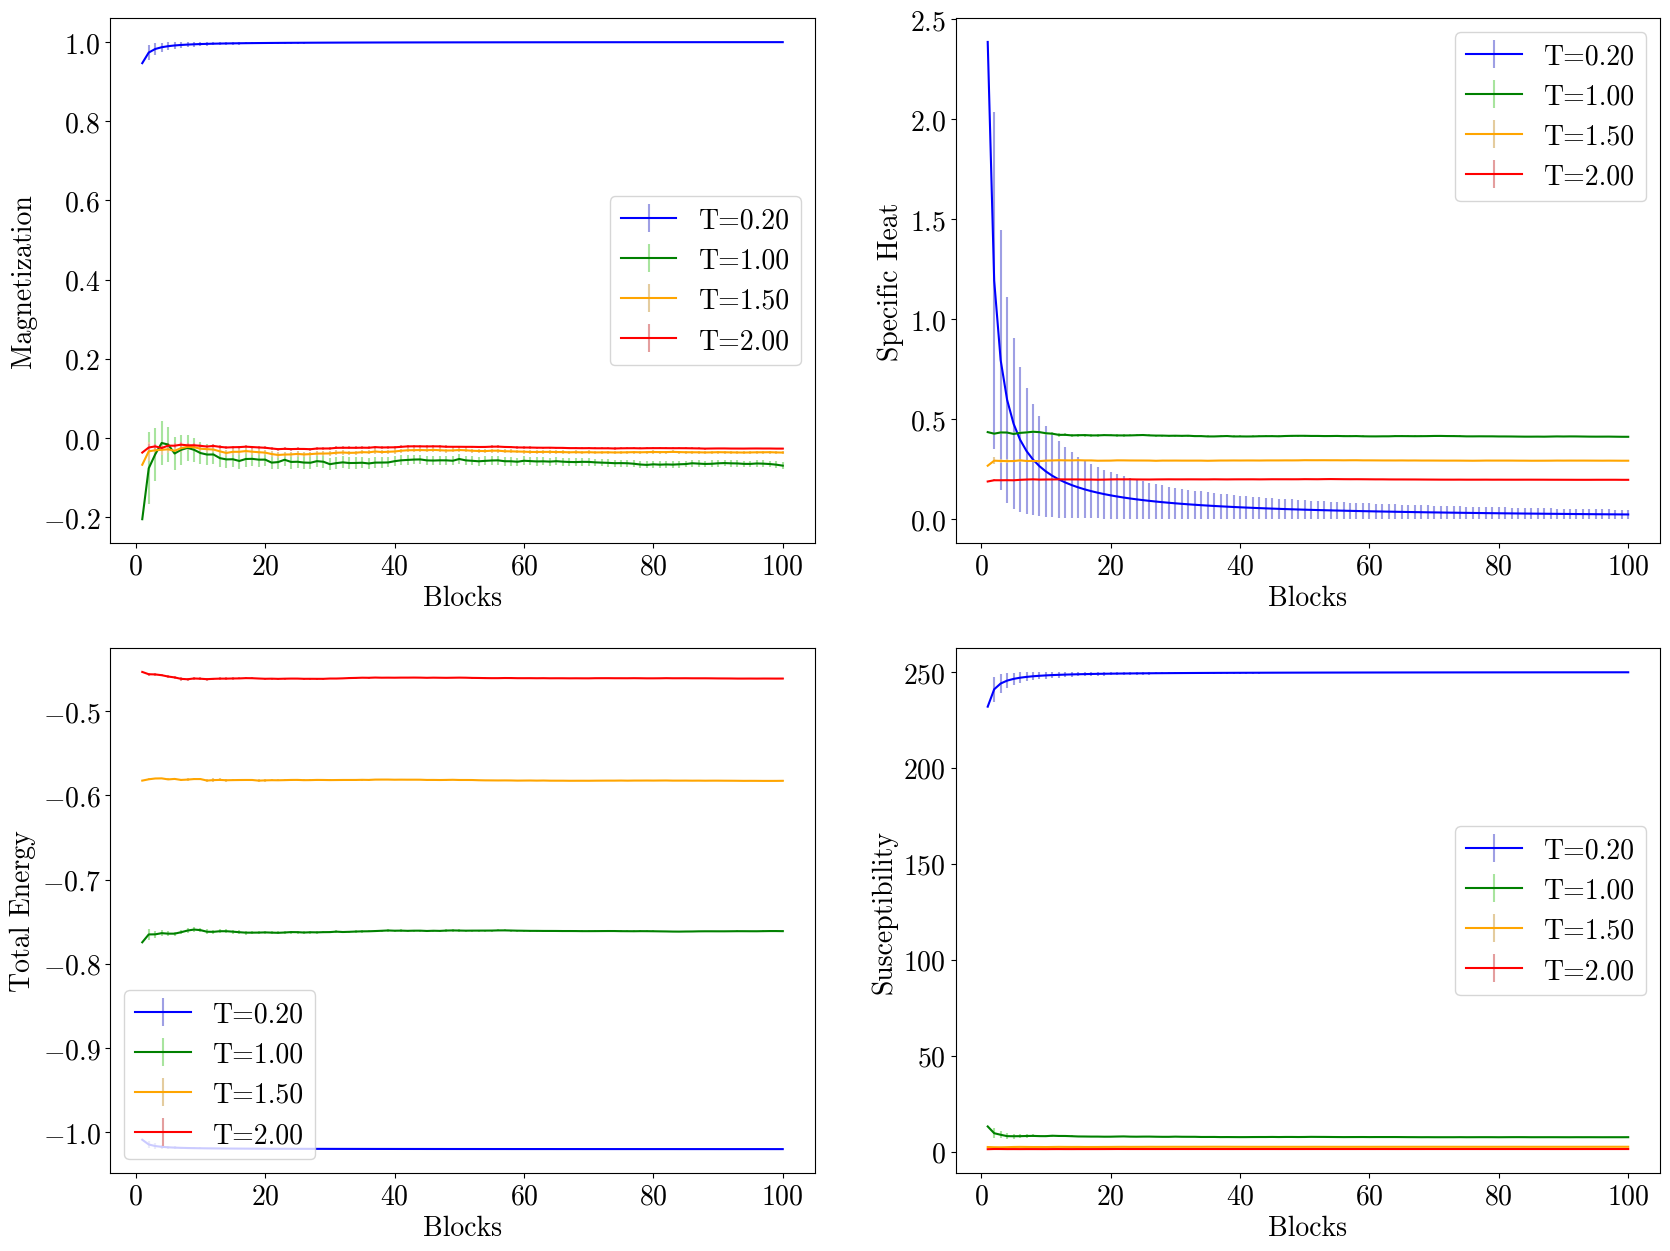

In [142]:
#EQUILIBRATION PLOTS
fig,ax = plt.subplots(2,2,figsize=(20,15))
temps=['0.20','1.00','1.50','2.00']
cols=['blue','green','orange','red']
ecols=['#9e9fe4','#a8e49e','#e4cc9e','#e49e9e']
files=['magnetization.dat','specific_heat.dat','susceptibility.dat','total_energy.dat']
for temp,col,ecol in zip(temps,cols,ecols):
    data1=np.loadtxt('equilibration/Gibbs/Mag_field_on/temp_'+temp+'/OUTPUT/magnetization.dat')
    data2=np.loadtxt('equilibration/Gibbs/Mag_field_on/temp_'+temp+'/OUTPUT/specific_heat.dat')
    data3=np.loadtxt('equilibration/Gibbs/Mag_field_on/temp_'+temp+'/OUTPUT/total_energy.dat')
    data4=np.loadtxt('equilibration/Gibbs/Mag_field_on/temp_'+temp+'/OUTPUT/susceptibility.dat')
    ax[0,0].errorbar(data1[:,0],data1[:,2],yerr=data1[:,3],color=col,ecolor=ecol,label='T='+temp)
    ax[0,0].set_ylabel('Magnetization')
    ax[0,0].set_xlabel('Blocks')
    ax[0,0].legend()
    ax[0,1].errorbar(data2[:,0],data2[:,2],yerr=data2[:,3],color=col,ecolor=ecol,label='T='+temp)
    ax[0,1].set_ylabel('Specific Heat')
    ax[0,1].set_xlabel('Blocks')
    ax[0,1].legend()
    ax[1,0].errorbar(data3[:,0],data3[:,2],yerr=data3[:,3],color=col,ecolor=ecol,label='T='+temp)
    ax[1,0].set_ylabel('Total Energy')
    ax[1,0].set_xlabel('Blocks')
    ax[1,0].legend()
    ax[1,1].errorbar(data4[:,0],data4[:,2],yerr=data4[:,3],color=col,ecolor=ecol,label='T='+temp)
    ax[1,1].set_ylabel('Susceptibility')
    ax[1,1].set_xlabel('Blocks')
    ax[1,1].legend()

As we can see in the plots above the system reach equilibrium after tale equilibration,so it is possible to start measuring and averaging in order to compare the theoretical properties of the 1D Ising model with the simulated ones.

## Simulations:
After equilibritation i have restarted every simulation in order to start averaging at equilibrium avoding correlations. To restart the simulation, the input file for every temperature is been modified:
- changing the `restart` label equal to $0$
- setting as initial spin configuration the saved one in the output of the equilibration at the same temperature

### Plot parameters:
- $N_{blocks}=500$
- $L_{blocks}=10^4$
- 
### Magnetization:

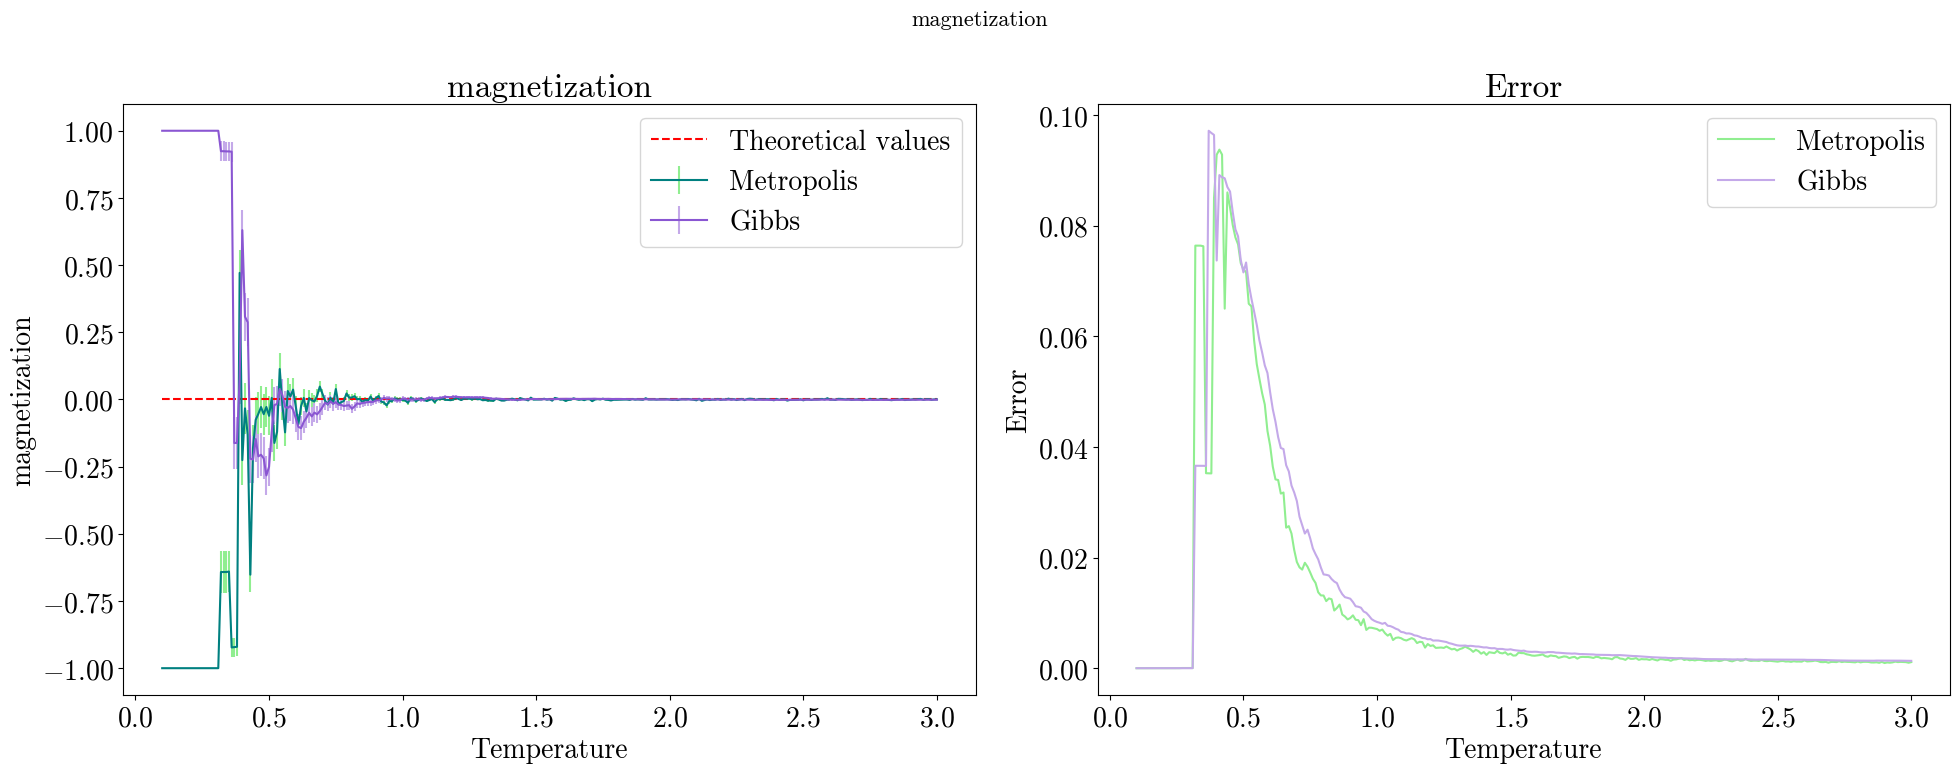

In [138]:
# With no field
datametro=np.loadtxt('results_Metropolis_Mag_field_off.dat',skiprows=1,delimiter=';')
datagibbs=np.loadtxt('results_Gibbs_Mag_field_off.dat',skiprows=1,delimiter=';')
plot_figure(datametro,datagibbs,label='M',h=0,title='magnetization')

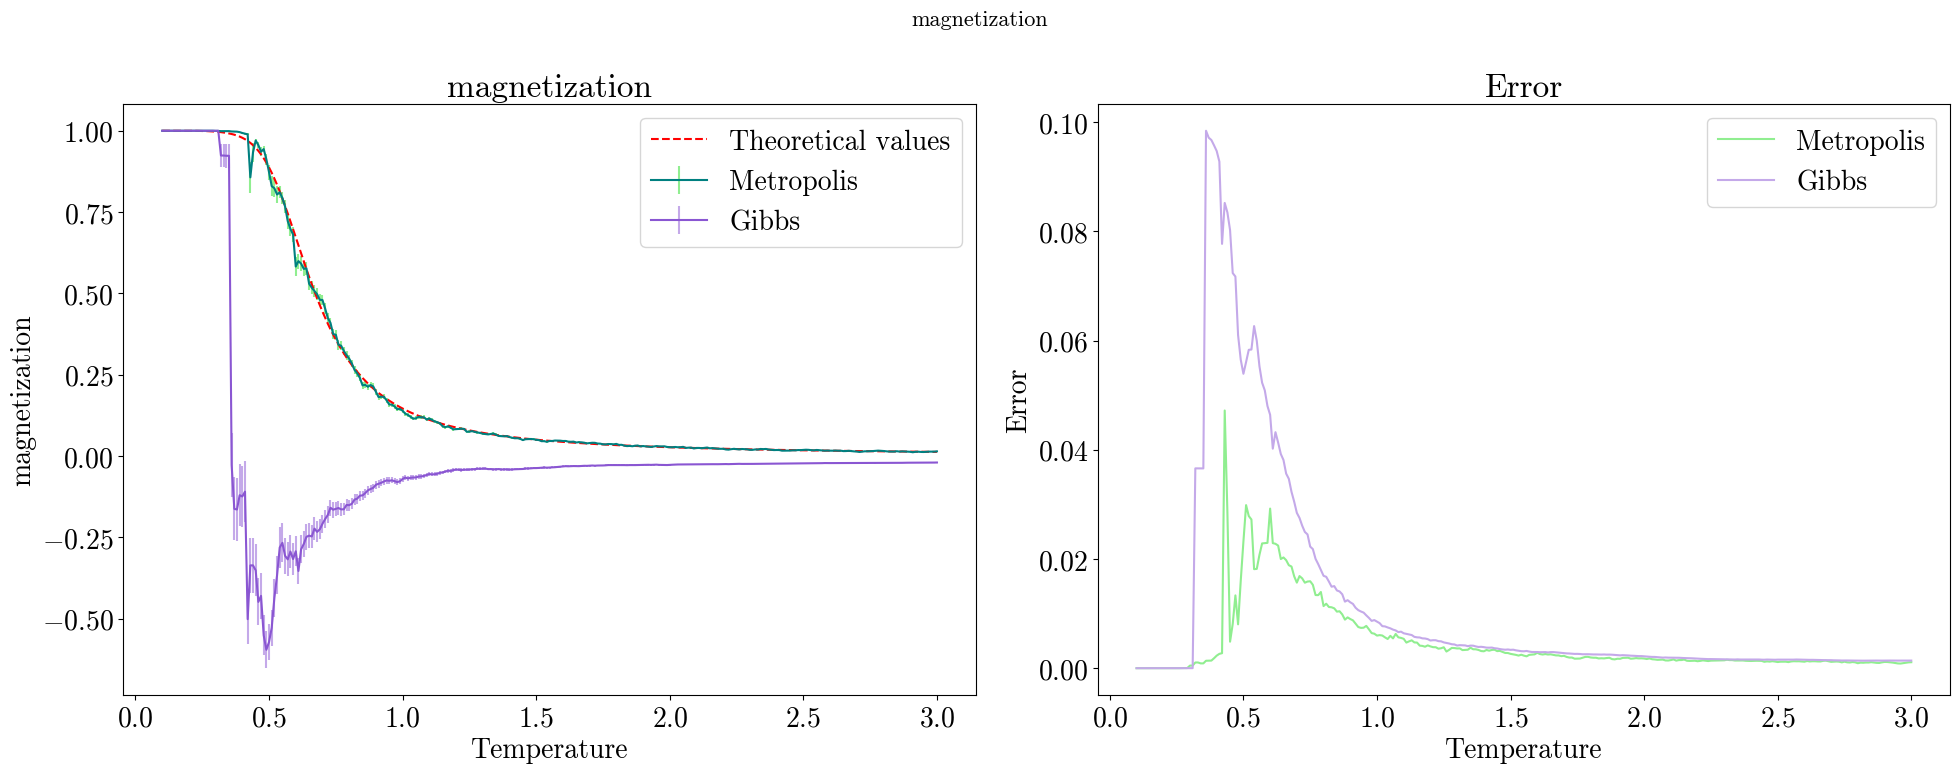

In [143]:
# With field h=0.02
datametro=np.loadtxt('results_Metropolis_Mag_field_on.dat',skiprows=1,delimiter=';')
datagibbs=np.loadtxt('results_Gibbs_Mag_field_on.dat',skiprows=1,delimiter=';')
plot_figure(datametro,datagibbs,label='M',h=0.02,title='magnetization')

### Heat Capacity:

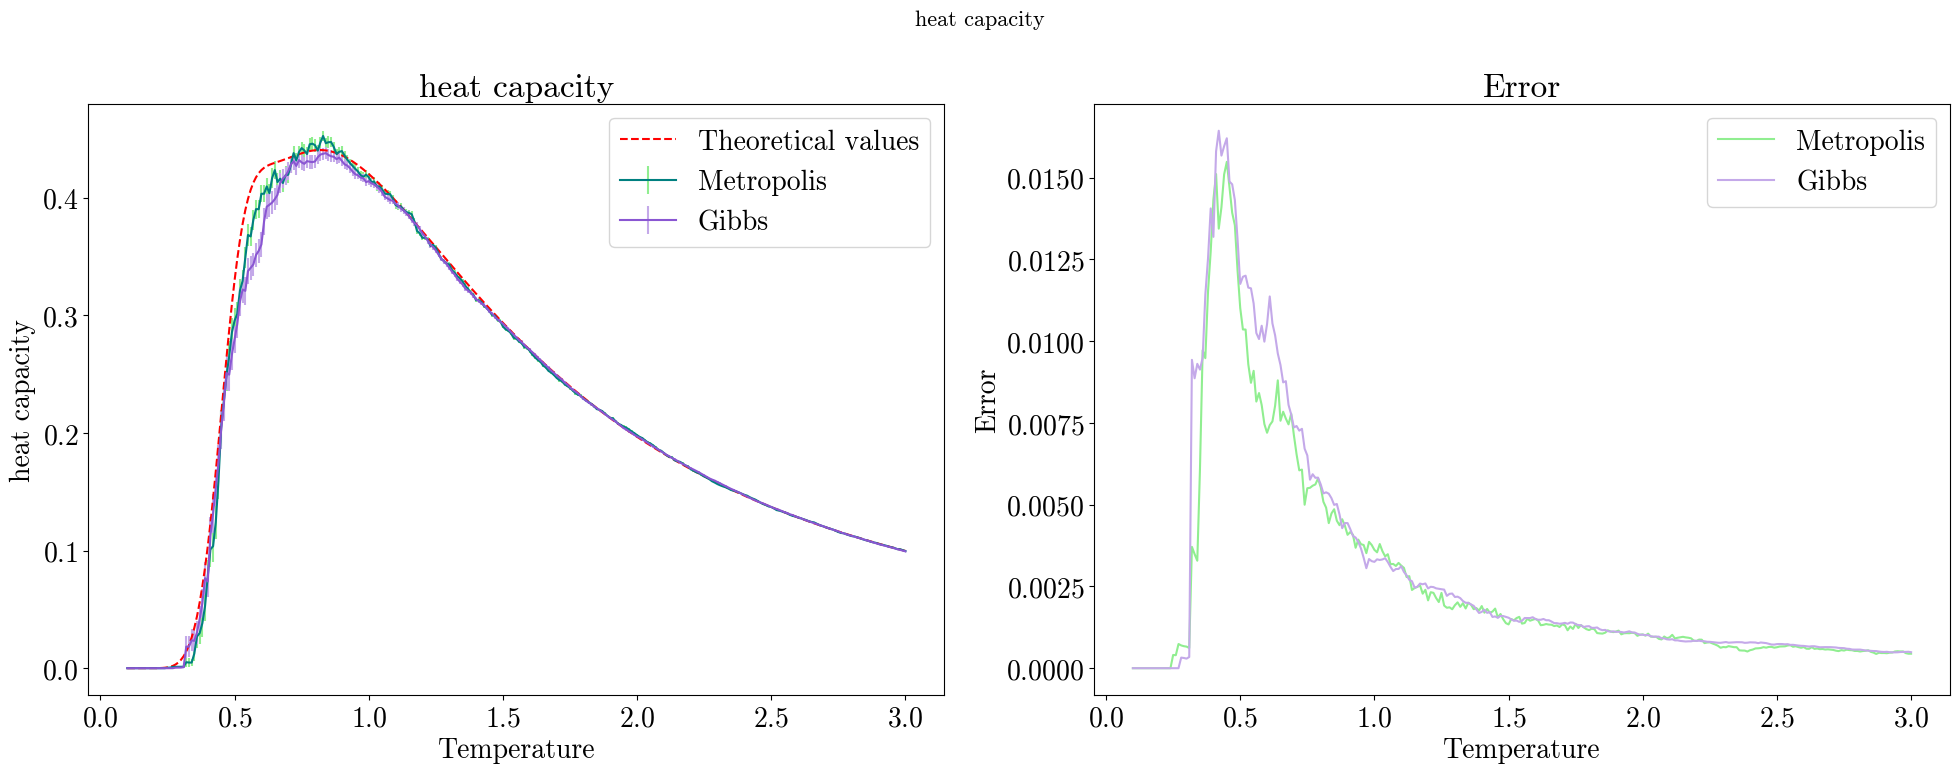

In [140]:
# With no field
datametro=np.loadtxt('results_Metropolis_Mag_field_off.dat',skiprows=1,delimiter=';')
datagibbs=np.loadtxt('results_Gibbs_Mag_field_off.dat',skiprows=1,delimiter=';')
plot_figure(datametro,datagibbs,label='heat',h=0,title='heat capacity')

### Susceptibility:

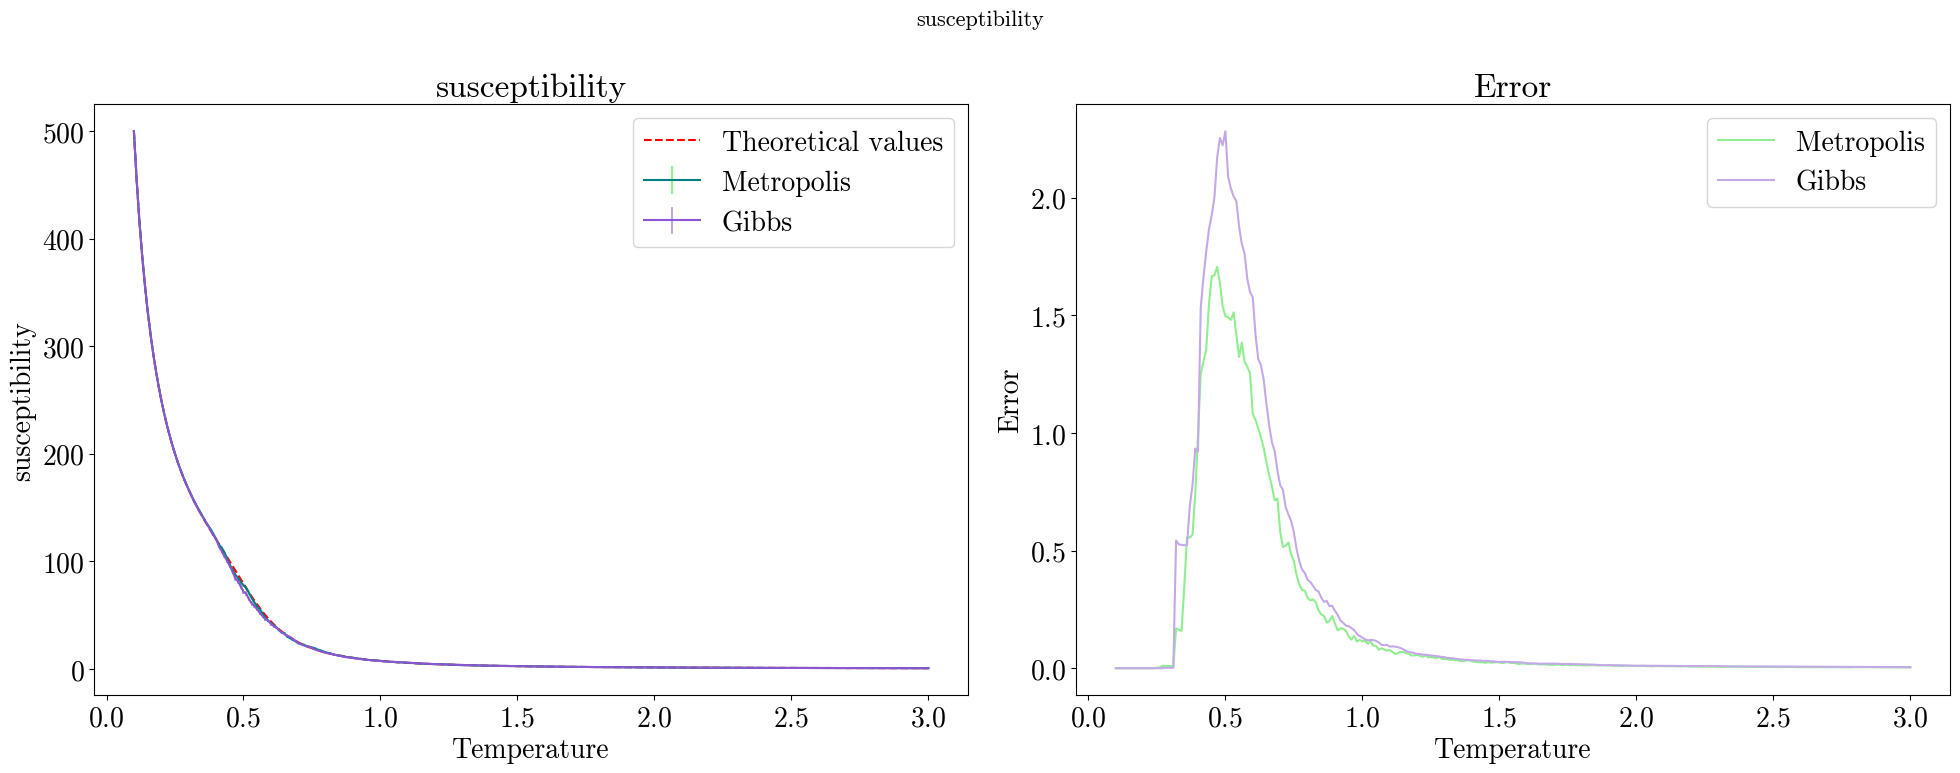

In [141]:
# With no field
datametro=np.loadtxt('results_Metropolis_Mag_field_off.dat',skiprows=1,delimiter=';')
datagibbs=np.loadtxt('results_Gibbs_Mag_field_off.dat',skiprows=1,delimiter=';')
plot_figure(datametro,datagibbs,label='chi',h=0,title='susceptibility')

### Results:
As we can see from the plots above both the metropolis algorithm and the gibbs sampler perform well and the curves obtained are coherent with the theoretical ones. The Metropolis algorithm perform slightly better than the gibbs sampler as we can see from the errors' plots where the metropolis' error is lower than the gibbs' one.